In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn import metrics
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
import seaborn as sns

In [4]:
data=pd.read_csv("Wholesale customers data.csv")
data.head(20)
data.tail(20)

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
420,1,3,4456,5266,13227,25,6818,1393
421,2,3,17063,4847,9053,1031,3415,1784
422,1,3,26400,1377,4172,830,948,1218
423,2,3,17565,3686,4657,1059,1803,668
424,2,3,16980,2884,12232,874,3213,249
425,1,3,11243,2408,2593,15348,108,1886
426,1,3,13134,9347,14316,3141,5079,1894
427,1,3,31012,16687,5429,15082,439,1163
428,1,3,3047,5970,4910,2198,850,317
429,1,3,8607,1750,3580,47,84,2501


In [6]:
x=np.array(data.drop(['Channel'],axis=1))
y=np.array(data['Channel'])

In [7]:
x.shape, y.shape

((440, 7), (440,))

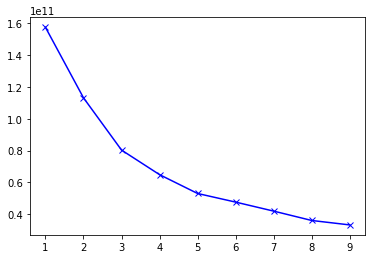

In [9]:
data2=[]
K=range(1,10)
for k in K:
    kmeanModel=KMeans(n_clusters=k).fit(x)
    data2.append(kmeanModel.inertia_)
plt.plot(K, data2, 'bx-')

In [10]:
kmeans=KMeans(n_clusters=3).fit(data)
centroids=kmeans.cluster_centers_

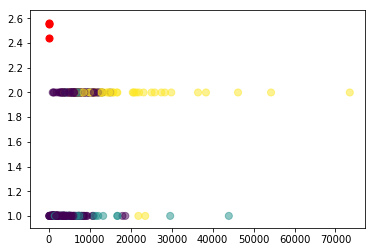

In [14]:
plt.scatter(data['Milk'],data['Channel'],c=kmeans.labels_.astype(float),s=50, alpha=0.5)
plt.scatter(centroids[:,0],centroids[:,1],c='red', s=50)
plt.show()

In [15]:
cat_names=['Channel','Region']
con_names=['Fresh','Milk','Grocery','Frozen','Detergents_Paper','Delicassen']

In [20]:
for c in cat_names:
    data_tmp=pd.get_dummies(data[c],prefix=c)
data[cat_names].shape

(440, 2)

C:\Users\Administrator\Anaconda3\lib\site-packages\sklearn\cluster\k_means_.py:971: ConvergenceWarning: Number of distinct clusters (3) found smaller than n_clusters (4). Possibly due to duplicate points in X.
  return_n_iter=True)
C:\Users\Administrator\Anaconda3\lib\site-packages\sklearn\cluster\k_means_.py:971: ConvergenceWarning: Number of distinct clusters (3) found smaller than n_clusters (5). Possibly due to duplicate points in X.
  return_n_iter=True)
C:\Users\Administrator\Anaconda3\lib\site-packages\sklearn\cluster\k_means_.py:971: ConvergenceWarning: Number of distinct clusters (3) found smaller than n_clusters (6). Possibly due to duplicate points in X.
  return_n_iter=True)
C:\Users\Administrator\Anaconda3\lib\site-packages\sklearn\cluster\k_means_.py:971: ConvergenceWarning: Number of distinct clusters (3) found smaller than n_clusters (7). Possibly due to duplicate points in X.
  return_n_iter=True)
C:\Users\Administrator\Anaconda3\lib\site-packages\sklearn\cluster\k_mea

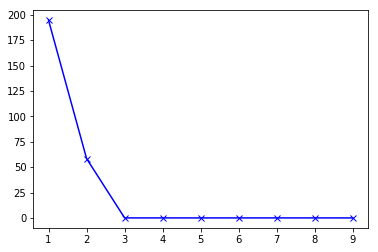

In [25]:
data3=[]
R=range(1,10)
for r in R:
    kmeanModel=KMeans(n_clusters=r).fit(data_tmp)
    data3.append(kmeanModel.inertia_)
plt.plot(R, data3, 'bx-')